<a href="https://colab.research.google.com/github/gani0325/2022/blob/main/kaggle/Pneumonia_Normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## kaggle 
### 2022.03.20

- https://www.kaggle.com/code/rafetcan/pneumonia-normal-cnn-model/notebook

- kaggle 참고했습니다

## 1. data


- 3 folders (train, test, val)
- each image category (Pneumonia/Normal)
- 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal)

## 2. import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
from glob import glob
import cv2

from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## 3. file

In [2]:
train_dir = '/content/drive/MyDrive/가은/2022/project/Data/chest_xray/train'
test_dir =  '/content/drive/MyDrive/가은/2022/project/Data/chest_xray/test'
val_dir = '/content/drive/MyDrive/가은/2022/project/Data/chest_xray/val'

## 4. read image & train_test split

In [3]:
def picture_separation(folder):
    y = []
    x = []
    image_list = []

    for foldername in os.listdir(folder):
        if not foldername.startswith('.'):
            if foldername == "NORMAL":
                label = 0
            elif foldername == "PNEUMONIA":
                label = 1
            else:
                label = 2
                
            for image_filename in os.listdir(folder + "/"+ foldername):
                img_file = cv2.imread(folder + "/" + foldername + '/' + image_filename,0)               
                

                if img_file is not None:
                    img = cv2.resize(img_file,(64,64))
                    img_arr = img_to_array(img) / 255
                    x.append(img_arr)
                    y.append(label)
                    image_list.append(foldername + '/' + image_filename)
                                        
    X = np.asarray(x)
    y = np.asarray(y)

    return X,y,image_list

- train_df

In [4]:
X_train, y_train, img_train = picture_separation(train_dir)

train_df = pd.DataFrame(img_train, columns=["images"])
train_df["target"] = y_train

In [7]:
train_df.head(10)

,images,target
0,NORMAL/IM-0519-0001.jpeg,0
1,NORMAL/IM-0527-0001.jpeg,0
2,NORMAL/IM-0523-0001-0002.jpeg,0
3,NORMAL/IM-0515-0001.jpeg,0
4,NORMAL/IM-0524-0001.jpeg,0
5,NORMAL/IM-0519-0001-0002.jpeg,0
6,NORMAL/IM-0543-0001-0002.jpeg,0
7,NORMAL/IM-0529-0001.jpeg,0
8,NORMAL/IM-0531-0001-0001.jpeg,0
9,NORMAL/IM-0532-0001.jpeg,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216 entries, 0 to 5215
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  5216 non-null   object
 1   target  5216 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 81.6+ KB


In [8]:
train_df.isnull().sum()

images    0
target    0
dtype: int64

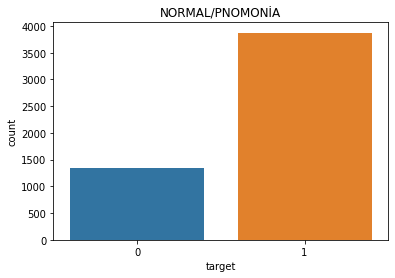

1    3875
0    1341
Name: target, dtype: int64


In [9]:
sns.countplot(train_df["target"])
plt.title("NORMAL/PNOMONİA")
plt.show()
print(train_df["target"].value_counts())

- val_df

In [10]:
X_val, y_val, img_val = picture_separation(val_dir)

val_df = pd.DataFrame(img_val, columns=["images"])
val_df["target"] = y_val

In [11]:
val_df.head()

,images,target
0,NORMAL/NORMAL2-IM-1440-0001.jpeg,0
1,NORMAL/NORMAL2-IM-1430-0001.jpeg,0
2,NORMAL/NORMAL2-IM-1442-0001.jpeg,0
3,NORMAL/NORMAL2-IM-1427-0001.jpeg,0
4,NORMAL/NORMAL2-IM-1436-0001.jpeg,0


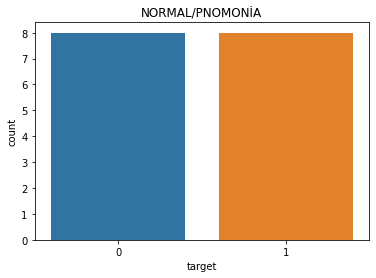

0    8
1    8
Name: target, dtype: int64


In [12]:
sns.countplot(val_df["target"])
plt.title("NORMAL/PNOMONİA")
plt.show()
print(val_df["target"].value_counts())

- test_df

In [13]:
X_test, y_test, img_test = picture_separation(test_dir)

test_df = pd.DataFrame(img_test, columns=["images"])
test_df["target"] = y_test

In [14]:
test_df.tail()

,images,target
619,NORMAL/NORMAL2-IM-0346-0001.jpeg,0
620,NORMAL/NORMAL2-IM-0348-0001.jpeg,0
621,NORMAL/NORMAL2-IM-0340-0001.jpeg,0
622,NORMAL/NORMAL2-IM-0338-0001.jpeg,0
623,NORMAL/NORMAL2-IM-0350-0001.jpeg,0


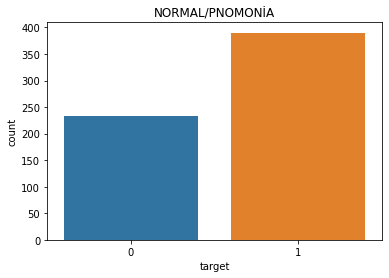

1    390
0    234
Name: target, dtype: int64


In [15]:
sns.countplot(test_df["target"])
plt.title("NORMAL/PNOMONİA")
plt.show()
print(test_df["target"].value_counts())

- full_data

In [16]:
 full_data = pd.concat([train_df, test_df, val_df], axis=0, ignore_index=True)

In [17]:
print(full_data.head())
print(full_data.tail())

                          images  target
0       NORMAL/IM-0519-0001.jpeg       0
1       NORMAL/IM-0527-0001.jpeg       0
2  NORMAL/IM-0523-0001-0002.jpeg       0
3       NORMAL/IM-0515-0001.jpeg       0
4       NORMAL/IM-0524-0001.jpeg       0
                                       images  target
5851  PNEUMONIA/person1950_bacteria_4881.jpeg       1
5852  PNEUMONIA/person1951_bacteria_4882.jpeg       1
5853  PNEUMONIA/person1954_bacteria_4886.jpeg       1
5854  PNEUMONIA/person1946_bacteria_4874.jpeg       1
5855  PNEUMONIA/person1947_bacteria_4876.jpeg       1


- 시각화

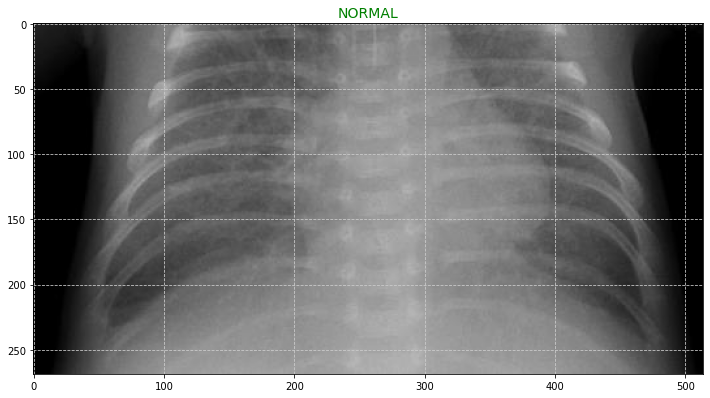

In [18]:
plt.figure(figsize=(12,8))

img = load_img(train_dir + "/" + full_data["images"][3875])
plt.imshow(img)
plt.title("NORMAL", color = "green", size = 14)
plt.grid(color='#CCCCCC', linestyle='--')
plt.show()

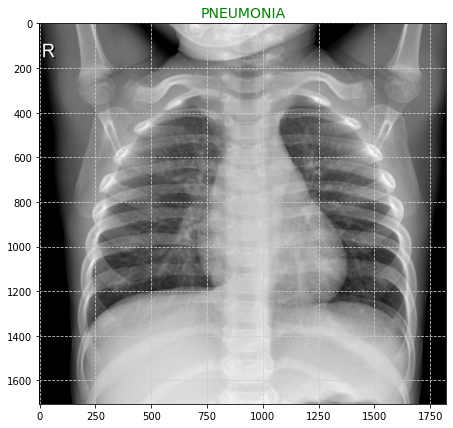

In [19]:
plt.figure(figsize=(10,7))

img = load_img(train_dir + "/" + full_data["images"][0])
plt.imshow(img)
plt.title("PNEUMONIA", color = "green", size = 14)
plt.grid(color='#CCCCCC', linestyle='--')
plt.show()

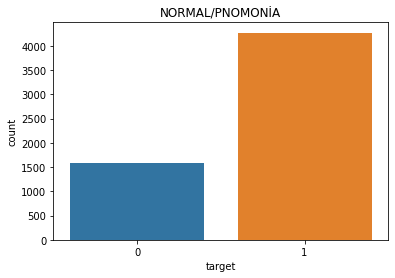

1    4273
0    1583
Name: target, dtype: int64


In [20]:
sns.countplot(full_data["target"])
plt.title("NORMAL/PNOMONİA")
plt.show()
print(full_data["target"].value_counts())

## 5. 시각화

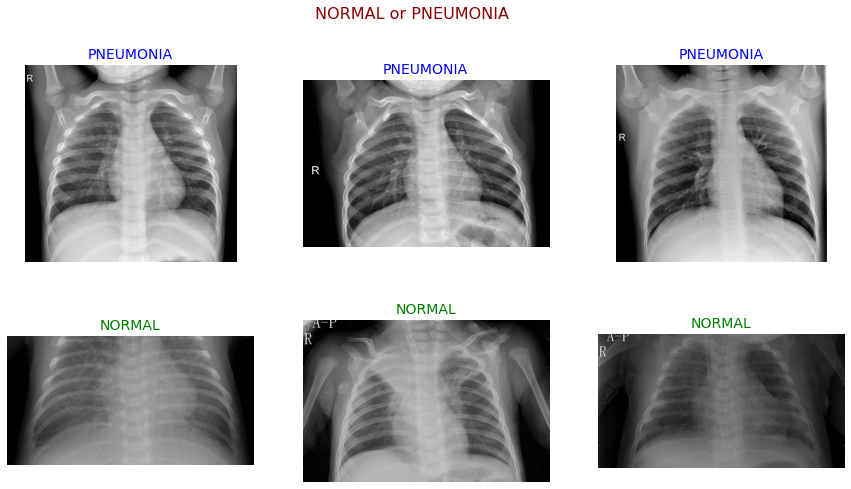

In [21]:
plt.figure(figsize=(15,8))

plt.subplot(2,3,1) 
img = load_img(train_dir + "/" + full_data["images"][0])
plt.imshow(img)
plt.title("PNEUMONIA", color = "blue", size = 14)
plt.axis("off")


plt.subplot(2,3,2) 
img = load_img(train_dir + "/" + full_data["images"][1])
plt.imshow(img)
plt.title("PNEUMONIA", color = "blue", size = 14)
plt.axis("off")

plt.subplot(2,3,3) 
img = load_img(train_dir + "/" + full_data["images"][10])
plt.imshow(img)
plt.title("PNEUMONIA", color = "blue", size = 14)
plt.axis("off")

plt.subplot(2,3,4) 
img = load_img(train_dir + "/" + full_data["images"][3875])
plt.imshow(img)
plt.title("NORMAL", color = "green", size = 14)
plt.axis("off")

plt.subplot(2,3,5) 
img = load_img(train_dir + "/" + full_data["images"][3876])
plt.imshow(img)
plt.title("NORMAL", color = "green", size = 14)
plt.axis("off")

plt.subplot(2,3,6) 
img = load_img(train_dir + "/" + full_data["images"][3877])
plt.imshow(img)
plt.title("NORMAL", color = "green", size = 14)
plt.axis("off")

plt.suptitle("NORMAL or PNEUMONIA", size = 16, color = "darkred")
plt.show()

In [22]:
X_train.shape

(5216, 64, 64, 1)

In [23]:
className = glob(train_dir + '/*' )
numberOfClass = len(className)
print("NumberOfClass: ",numberOfClass)

NumberOfClass:  2


## 6. 데이터 증강

In [24]:
batch_size = 32

In [25]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                   shear_range = 0.3,
                   horizontal_flip=True,
                   zoom_range = 0.3)

In [26]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [27]:
val_datagen = ImageDataGenerator(rescale= 1./255)

In [28]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(64, 64),
        batch_size = batch_size,
        color_mode = "grayscale",
        class_mode= "binary")

Found 5216 images belonging to 2 classes.


In [29]:
test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size=(64, 64),
        batch_size = batch_size,
        color_mode = "grayscale",
        class_mode= "binary")

Found 624 images belonging to 2 classes.


In [30]:
val_generator = test_datagen.flow_from_directory(
        val_dir, 
        target_size=(64, 64),
        batch_size = batch_size,
        color_mode = "grayscale",
        class_mode= "binary")

Found 16 images belonging to 2 classes.


## 7. model 만들기

In [31]:
X_train.shape[1:]

(64, 64, 1)

In [32]:
X_train.shape

(5216, 64, 64, 1)

In [33]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.4))
model.add(Dense(1)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

- early stopping

In [34]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [35]:
history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=5216//32,
                    epochs=20,
                    validation_data=test_generator,
                    validation_steps=624//32,
                    callbacks=[early_stopping])

Epoch 1/20
163/163 [==============================] - 104s 622ms/step - loss: 0.4590 - accuracy: 0.7974 - val_loss: 0.4044 - val_accuracy: 0.8158
Epoch 2/20
163/163 [==============================] - 93s 571ms/step - loss: 0.2835 - accuracy: 0.8781 - val_loss: 0.3717 - val_accuracy: 0.8618
Epoch 3/20
163/163 [==============================] - 93s 571ms/step - loss: 0.2276 - accuracy: 0.9059 - val_loss: 0.2955 - val_accuracy: 0.8980
Epoch 4/20
163/163 [==============================] - 96s 586ms/step - loss: 0.1973 - accuracy: 0.9201 - val_loss: 0.3085 - val_accuracy: 0.9030
Epoch 5/20
163/163 [==============================] - 92s 566ms/step - loss: 0.1919 - accuracy: 0.9254 - val_loss: 0.2869 - val_accuracy: 0.9178
Epoch 6/20
163/163 [==============================] - 94s 578ms/step - loss: 0.1774 - accuracy: 0.9344 - val_loss: 0.4356 - val_accuracy: 0.8898
Epoch 7/20
163/163 [==============================] - 93s 571ms/step - loss: 0.1740 - accuracy: 0.9346 - val_loss: 0.4584 - val_a

In [36]:
print("Accuracy of the model is - " , model.evaluate_generator(test_generator)[1]*100 , "%")
print("Loss of the model is - " , model.evaluate_generator(test_generator)[0])

Accuracy of the model is -  88.62179517745972 %
Loss of the model is -  0.457964152097702


## 8. 시각화

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

- loss

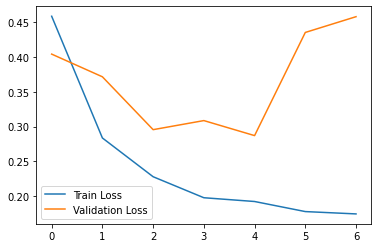

In [38]:
plt.figure()
plt.plot(history.history["loss"],label = "Train Loss")
plt.plot(history.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()

- accuracy

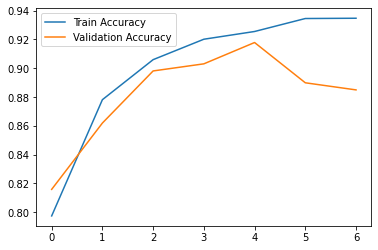

In [39]:
plt.figure()
plt.plot(history.history["accuracy"],label = "Train Accuracy")
plt.plot(history.history["val_accuracy"],label = "Validation Accuracy")
plt.legend()
plt.show()